## Docker specific configurations

Prepare python path

In [1]:
from sys import path
from pathlib import Path
path.append(str(Path("../../").resolve()))

## Prepare mesh

Generate mesh outside of the docker using the following commands:
```bash
gmsh mesh.geo -2
../../tools/convert_msh.py mesh.msh mesh.xdmf
```

## Solution preparation

Import BeamImpedance2D module

In [2]:
import logging
import bi2d
from bi2d.esum import Esum
from bi2d.materials import vacuum, beam, steel
import numpy as np

Assign material indices

In [3]:
beam.index = 1
vacuum.index = 2
steel.index = 3

Setup mesh and materials

In [4]:
m = bi2d.Mesh("mesh.xdmf")
mc = bi2d.MaterialMap(m, [beam, vacuum, steel])

Configure solution

In [5]:
solution = bi2d.Solution(mc, Hcurl_order=2, H1_order=2)

Enable info level logging

In [6]:
solution.logger.setLevel(logging.INFO)

## Solve and visualize fields

Solve and visualize the fields for one frequency point

In [7]:
solution.get_z([1e5], beta=0.1, source_function=bi2d.SourceFunction.MONOPOLE)

INFO:bi2d.solution:Solving for f=1.00e+05, β=0.10


array([[100000.  ,      0.  ,    -19.73]])

`Esum` object allows us to summate rotational and irrotational fields for visualization

In [8]:
esum = Esum(solution)
esum.solve()
solution.save("solution.xdmf")

Use `paraview solution.xdmf` command to visualize solution from desktop. Note, that `paraview` needs both `solution.xdmf` and `solution.h5` files.

## Calculate impedance

Calculate impedance in frequency range and save the results

In [9]:
%%time

data01 = solution.get_z(np.logspace(5, 12, num=30), beta=0.1, source_function=bi2d.SourceFunction.MONOPOLE)

INFO:bi2d.solution:Solving for f=1.00e+05, β=0.10
INFO:bi2d.solution:Solving for f=1.74e+05, β=0.10
INFO:bi2d.solution:Solving for f=3.04e+05, β=0.10
INFO:bi2d.solution:Solving for f=5.30e+05, β=0.10
INFO:bi2d.solution:Solving for f=9.24e+05, β=0.10
INFO:bi2d.solution:Solving for f=1.61e+06, β=0.10
INFO:bi2d.solution:Solving for f=2.81e+06, β=0.10
INFO:bi2d.solution:Solving for f=4.89e+06, β=0.10
INFO:bi2d.solution:Solving for f=8.53e+06, β=0.10
INFO:bi2d.solution:Solving for f=1.49e+07, β=0.10
INFO:bi2d.solution:Solving for f=2.59e+07, β=0.10
INFO:bi2d.solution:Solving for f=4.52e+07, β=0.10
INFO:bi2d.solution:Solving for f=7.88e+07, β=0.10
INFO:bi2d.solution:Solving for f=1.37e+08, β=0.10
INFO:bi2d.solution:Solving for f=2.40e+08, β=0.10
INFO:bi2d.solution:Solving for f=4.18e+08, β=0.10
INFO:bi2d.solution:Solving for f=7.28e+08, β=0.10
INFO:bi2d.solution:Solving for f=1.27e+09, β=0.10
INFO:bi2d.solution:Solving for f=2.21e+09, β=0.10
INFO:bi2d.solution:Solving for f=3.86e+09, β=0.10


CPU times: user 49.4 s, sys: 1.34 s, total: 50.8 s
Wall time: 50.8 s


In [10]:
%%time

data09 = solution.get_z(np.logspace(5, 12, num=30), beta=0.9, source_function=bi2d.SourceFunction.MONOPOLE)

INFO:bi2d.solution:Solving for f=1.00e+05, β=0.90
INFO:bi2d.solution:Solving for f=1.74e+05, β=0.90
INFO:bi2d.solution:Solving for f=3.04e+05, β=0.90
INFO:bi2d.solution:Solving for f=5.30e+05, β=0.90
INFO:bi2d.solution:Solving for f=9.24e+05, β=0.90
INFO:bi2d.solution:Solving for f=1.61e+06, β=0.90
INFO:bi2d.solution:Solving for f=2.81e+06, β=0.90
INFO:bi2d.solution:Solving for f=4.89e+06, β=0.90
INFO:bi2d.solution:Solving for f=8.53e+06, β=0.90
INFO:bi2d.solution:Solving for f=1.49e+07, β=0.90
INFO:bi2d.solution:Solving for f=2.59e+07, β=0.90
INFO:bi2d.solution:Solving for f=4.52e+07, β=0.90
INFO:bi2d.solution:Solving for f=7.88e+07, β=0.90
INFO:bi2d.solution:Solving for f=1.37e+08, β=0.90
INFO:bi2d.solution:Solving for f=2.40e+08, β=0.90
INFO:bi2d.solution:Solving for f=4.18e+08, β=0.90
INFO:bi2d.solution:Solving for f=7.28e+08, β=0.90
INFO:bi2d.solution:Solving for f=1.27e+09, β=0.90
INFO:bi2d.solution:Solving for f=2.21e+09, β=0.90
INFO:bi2d.solution:Solving for f=3.86e+09, β=0.90


CPU times: user 50.9 s, sys: 1.58 s, total: 52.5 s
Wall time: 52.5 s


## Plot impedances

In [11]:
import pylab
pylab.rcParams['figure.figsize'] = [12, 8]

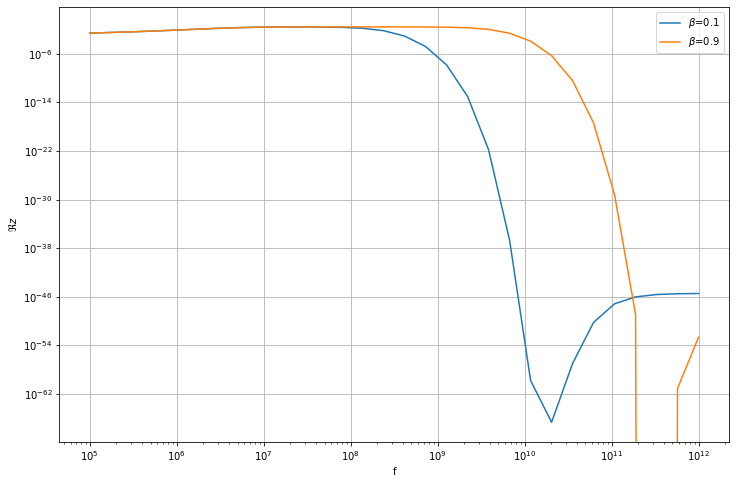

In [12]:
pylab.plot(data01[:,0], data01[:,1])
pylab.plot(data09[:,0], data09[:,1])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f")
pylab.ylabel(r"$\Re{z}$")
pylab.grid()
pylab.legend([r"$\beta$=0.1", r"$\beta$=0.9"])
pylab.show()

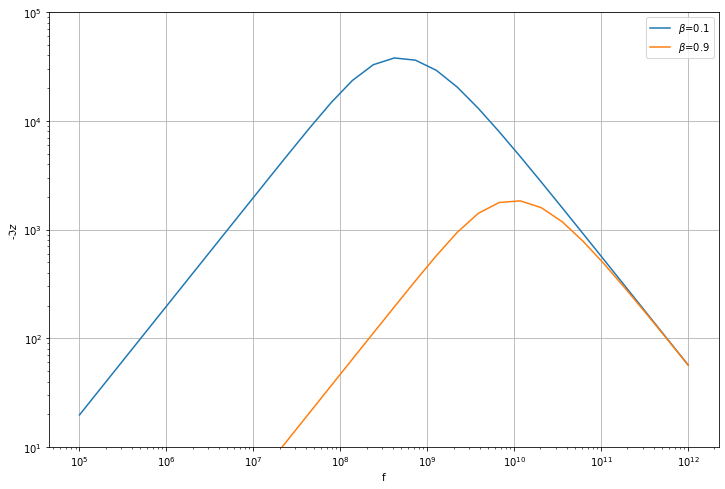

In [13]:
pylab.plot(data01[:,0], -data01[:,2])
pylab.plot(data09[:,0], -data09[:,2])
pylab.yscale("log")
pylab.xscale("log")
pylab.ylim((1e1, 1e5))
pylab.xlabel("f")
pylab.ylabel(r"-$\Im{z}$")
pylab.grid()
pylab.legend([r"$\beta$=0.1", r"$\beta$=0.9"])
pylab.show()